In [1]:
import numpy as np
import pandas as pd

In [2]:
x_test = pd.read_csv('test.csv')
x_train = pd.read_csv('train.csv')

y_train = x_train['label']

x_train = x_train.drop(['label'],axis=1)

x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

input_shape = (28, 28, 1)
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
history=model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
42000/42000 [==============================] - 59s 1ms/step - loss: 0.0260 - acc: 0.9916:  - ETA: 1s - loss: 0.02
Epoch 2/5
42000/42000 [==============================] - 59s 1ms/step - loss: 0.0201 - acc: 0.9932
Epoch 3/5
42000/42000 [==============================] - 58s 1ms/step - loss: 0.0174 - acc: 0.9946
Epoch 4/5
42000/42000 [==============================] - 58s 1ms/step - loss: 0.0130 - acc: 0.9957: 1s - loss: 0.012
Epoch 5/5
42000/42000 [==============================] - 58s 1ms/step - loss: 0.0120 - acc: 0.9962:


## Training History Visualization

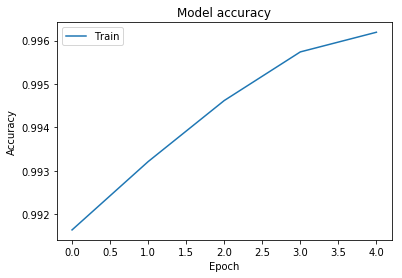

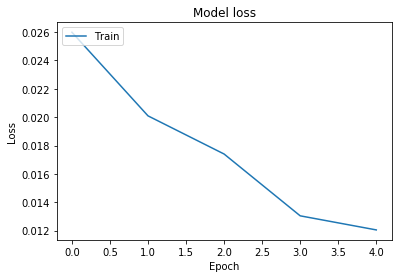

In [10]:
import matplotlib.pyplot as plt
# Plot accuracy & loss values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
predictions = model.predict(x_test)

results = predictions.argmax(axis=1)
results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("solution.csv",index=False)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para